# COMP3222/6246 Machine Learning Technologies (2019/20)
## Lab 3 – Decision Trees, Random Forests, Ensemble Learning

Follow each code block at your own pace, you can have a look at the book or ask questions to demonstrators if you find something confusing.

# Chapter 6 - Decision Trees
"_Decision Trees_ are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks." [Geron2017] 

In [1]:
%matplotlib inline

    
import numpy as np

np.random.seed(42) # to ensure our results are exactly like the book

## 6.1 Training and Visualizing a Decision Tree

First, let's load the iris dataset from sci-kit learn library.

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

### 6.1.1 Determine Targets

Let's determine which columns will be in our interest and print them.

In [6]:
#this is how you get the keys of the data
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
#iris.data
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
#WHAT IS THE PURPOSE OF THE FIRST COLON BELOW? 

X = iris.data[:, 2:] # only focus on petal length and width
Y = iris.target

#this is how you get the feature names from the sklearn bunch
feature_names = iris.feature_names[2:]
print("given:",feature_names,", ", 
      "\npredict whether:", iris.target_names)

#target names gives you the value of the target values ie 0, 1, or 2 depending on what class it is in


given: ['petal length (cm)', 'petal width (cm)'] ,  
predict whether: ['setosa' 'versicolor' 'virginica']


### Exercise 6.1.1: Plot the data set
Plot the data set and have a look at the two features that are selected.

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
for target_index, target_name in enumerate(iris.target_names):
    print(target_index, " | ", target_name)

0  |  setosa
1  |  versicolor
2  |  virginica


In [15]:
X #X[:, 1]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

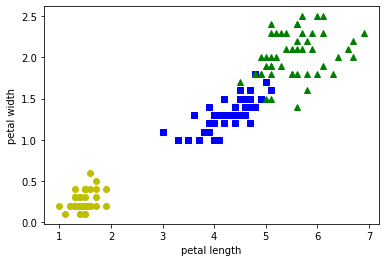

In [48]:
# use matplotlib as you did on previous labs

import matplotlib.pyplot as plt

color_map = ["yo","bs","g^"]

# enumerate will return a tuple on each iteration of a counter and the thing in the list
for target_index, target_name in enumerate(iris.target_names):
    
    
# get the first and second columns of the 2d array X, then only plot those points in X which have the label of the
# current target index which you are looking at

    #color_map[target_index] will return the value at indices 0, 1 or 2 in color map
    plt.plot(X[:, 0][Y==target_index], X[:, 1][Y==target_index], color_map[target_index], label = target_name)

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()            

### 6.1.2 Train the dataset
Without separating the dataset as we did in previous labs, let's use all the data set and train the decision tree.

In [53]:
#change the criterion to see which is better
tree_clf = DecisionTreeClassifier(max_depth = 5, criterion = 'gini')
tree_clf.fit(X,Y)

#see the score of each to see which is better
tree_clf.score(X,Y)

0.9933333333333333

There are many hyperparameters that a decision tree classifier has. You can see from the ouput above the parameters that will be used for predictions. Two criterions that you can use with decision trees in sci-kit learn.  These metrics are calculated in each node of decision tree.
* **Gini impurity** `criterion='gini'` is a measure of how often a randomly chosen element from a set would be incorrectly labeled. Formally it is computed by:
$$
I_G(p) = \sum_{i=1}^{J} p_i \sum_{k \neq i} p_k
$$
where $J$ denotes classes and $p_i$ is the fraction of items which are labeled with class $i$. For a concrete example have a look: https://stats.stackexchange.com/a/339514
* **Information Gain** `criterion='entropy'` is a mesaure of entropy, which is used in thermodynamics as a measure of molecular disorder. Entropy=0 means the molecules are well ordered.   
$$
H(T) = I_E(p)=-\sum_{i=1}^{J}p_i\log_2 p_i
$$
$p_1, p_2, ...$ as in gini impurity are the fractions that add up to 1. 

These two metrics are used for deciding the splits while training a decision tree.

### Exercise 6.1.2: Gini or Entropy
* Should you use Gini impurity or entropy?
* Which one is faster to compute and why?
* Visualize the tree that you trained above in 6.1.2. 
  * Why does _gini impurity_ metric decrease in deeper nodes? 
  * Which cases do you see that the metric is zero?

*Your answer here*

### 6.1.2 Visualization

You can export the decision tree as a `dot` file from sci-kit learn. You can convert `dot` to `png` image by installing `graphviz`.

In [54]:
from sklearn.tree import export_graphviz
export_graphviz(tree_clf,
                out_file="iris_tree.dot",
                feature_names=feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [55]:
# Make sure you installed graphviz (exclamation mark is for shell commands)
!apt install graphviz 

# Convert dot file to png file.
!dot -Tpng iris_tree.dot -o iris_tree.png

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



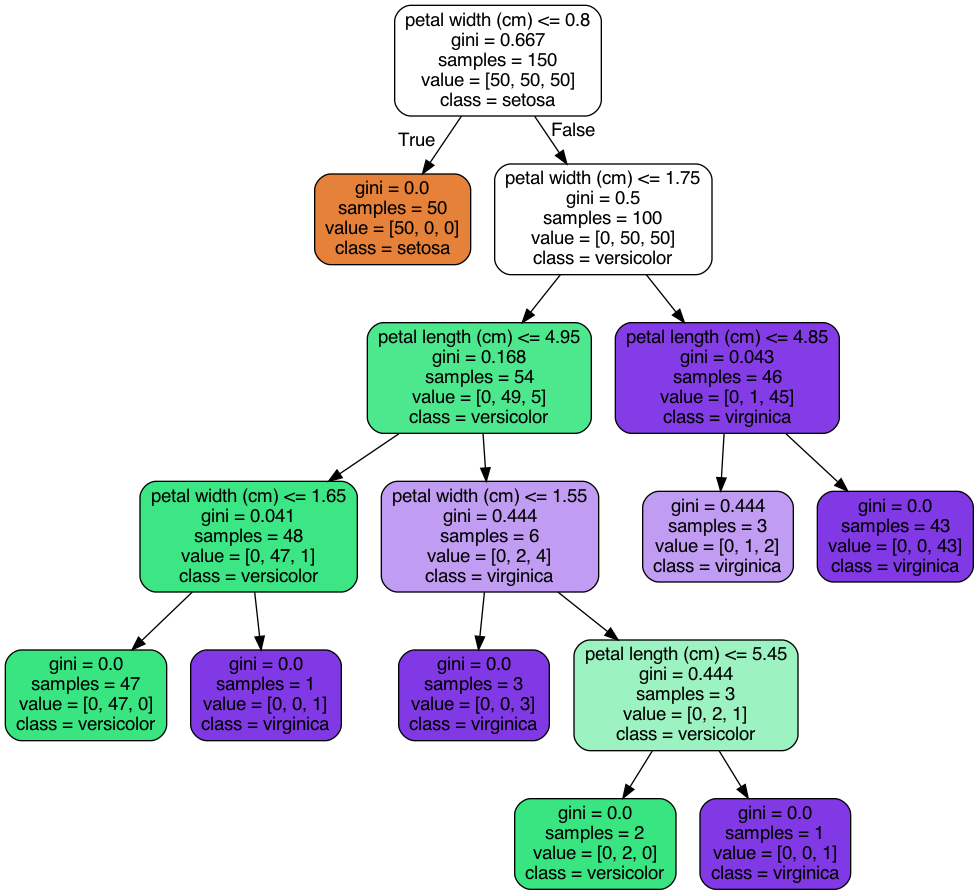

In [56]:
from IPython.display import Image
Image(filename='iris_tree.png') 

To see a better visualization example of decision trees, have a look at [this page](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

### Extra: Another way to visualize decision trees

There is a brand new visualization library from creators of ANTLR (parser generator) for decision trees called [`dtreeviz`](https://github.com/parrt/dtreeviz). You can find [some other examples](https://github.com/parrt/dtreeviz/blob/master/notebooks/examples.ipynb) from their repository for better visualization. Follow the steps below:

In [42]:
# install the package
!pip install dtreeviz
# (optional)
!apt-get install msttcorefonts -qq


     |████████████████████████████████| 48 kB 3.9 MB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 204.2 MB 65 kB/s  eta 0:00:015   |█▉                              | 11.9 MB 6.5 MB/s eta 0:00:30     |████                            | 25.9 MB 4.0 MB/s eta 0:00:45     |█████                           | 32.2 MB 8.8 MB/s eta 0:00:20     |█████▍                          | 34.7 MB 3.7 MB/s eta 0:00:46     |██████▍                         | 40.9 MB 8.8 MB/s eta 0:00:19     |██████████████▊                 | 93.8 MB 9.7 MB/s eta 0:00:12     |███████████████▌                | 99.2 MB 3.1 MB/s eta 0:00:34     |██████████████████▉             | 120.2 MB 14.0 MB/s eta 0:00:06     |███████████████████             | 121.0 MB 14.0 MB/s eta 0:00:06     |█████████████████████▏          | 134.7 MB 7.4 MB/s eta 0:00:10     |█████████████████████▍          | 136.5 MB 7.4 MB/s eta 0:00:10     |████████████████████████▊       | 15

In [57]:
from dtreeviz.trees import dtreeviz
import matplotlib as mpl

mpl.rcParams['axes.facecolor'] = 'white'
viz = dtreeviz(tree_clf,
              X,
              Y,
              target_name='flower type',
              feature_names=feature_names, 
              class_names=list(iris.target_names),
              fancy=True, 
              orientation ='TD')

# uncomment this            
# viz

### 6.1.3 Plot training data set

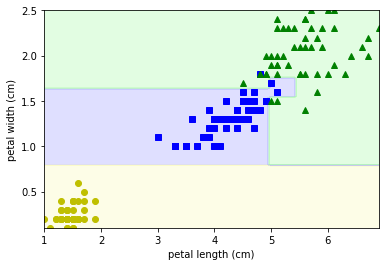

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
CUSTOM_CMAP = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
 
# helper function to plot the boundaries
def plot_decision_boundary(clf, x, y):
    color_map = ["yo", "bs", "g^"]
    for target_index, target_name in enumerate(iris.target_names):
        plt.plot(x[:, 0][y==target_index], # petal length on X axis (the ones that equal to target)
                 x[:, 1][y==target_index], # petal width on Y axis (the ones that equal to target)
                 color_map[target_index], 
                 label=target_name)
    
    x1s = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    x2s = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_test = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_test).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=CUSTOM_CMAP)

plot_decision_boundary(tree_clf, X, Y)

plt.xlabel(feature_names[0]) # petal length (cm)
plt.ylabel(feature_names[1]) # petal width (cm)
plt.show()

### Exercise 6.1: Plot decision boundaries
1. Write down which colour correspond to which node in the decision tree.
2. Try to increase/decrease `max_depth` of decision tree classifier and observe the changes in the decision boundaries. What would you set `max_depth`?
3. If the helper function (`plot_decision_boundary`) was not available to you, how would you visualize the decision boundaries? Tip:  try to create X's that ranges from $[1, 0]$ to $[7, 2.5]$ where. You can use:  


In [13]:
# check np.mgrid[minX1:maxX1:increment, minX2:maxX2:increment]
X = np.mgrid[0:10:1, -5:0:1].reshape(2,-1).T
X

array([[ 0, -5],
       [ 0, -4],
       [ 0, -3],
       [ 0, -2],
       [ 0, -1],
       [ 1, -5],
       [ 1, -4],
       [ 1, -3],
       [ 1, -2],
       [ 1, -1],
       [ 2, -5],
       [ 2, -4],
       [ 2, -3],
       [ 2, -2],
       [ 2, -1],
       [ 3, -5],
       [ 3, -4],
       [ 3, -3],
       [ 3, -2],
       [ 3, -1],
       [ 4, -5],
       [ 4, -4],
       [ 4, -3],
       [ 4, -2],
       [ 4, -1],
       [ 5, -5],
       [ 5, -4],
       [ 5, -3],
       [ 5, -2],
       [ 5, -1],
       [ 6, -5],
       [ 6, -4],
       [ 6, -3],
       [ 6, -2],
       [ 6, -1],
       [ 7, -5],
       [ 7, -4],
       [ 7, -3],
       [ 7, -2],
       [ 7, -1],
       [ 8, -5],
       [ 8, -4],
       [ 8, -3],
       [ 8, -2],
       [ 8, -1],
       [ 9, -5],
       [ 9, -4],
       [ 9, -3],
       [ 9, -2],
       [ 9, -1]])

### Exercise 6.1a: Solution

In [14]:
# Tip: try each point in the space 




### 6.1.4 Estimating Class Probabilities
To estimate the probability of an instance belongs to a class, you can use `predict_proba`, to determine the class that an instance will be assigned to use `predict`. 

In [15]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [16]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.1.5 Regularization Hyperparameters
"Constraining a model to make it simpler and reduce the risk of overfitting is called _regularization"  [Geron2017, page 27]  To avoid [overfitting](https://en.wikipedia.org/wiki/Overfitting), you can limit the generation of a node by `min_samples_leaf` (the minimum samples that a node must have to able to be splitted.). 


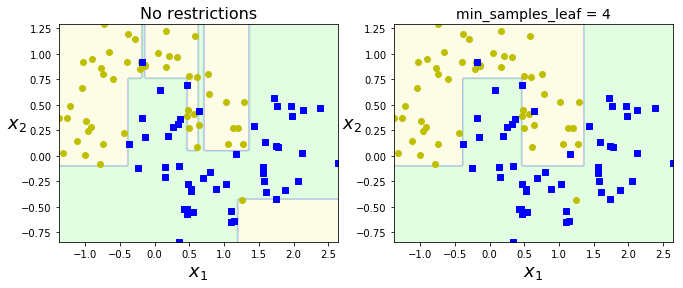

In [17]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf1, Xm, ym)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf2, Xm, ym)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)


plt.show()

## 6.2 Regression

Decision trees can be used for regression tasks too. Instead of predicting a class, in regression tasks, the aim is to predict a numberic value (such as the price of a car). Assume that we have this quadratic data set with some noise:

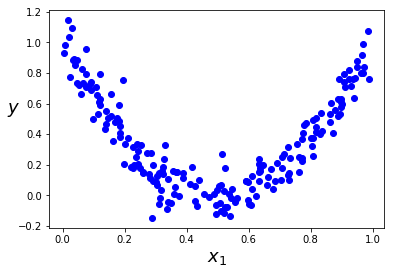

In [18]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) / 10

plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Exercise 6.2: Visualize the regression tree 

1. Visualize the regression tree same as before with _graphviz_.
2. Plot this regression tree (Tip: try many values for x (e.g. `np.linspace(min, max, noOfPoints)`)
3. Plot the decision boundaries of `max_depth=2` and `max_depth=3` regression trees (also try `min_samples_leaf=10`)
4. Compare the differences on the difference plots. Notice that the average is taken in the regions which are separated by the decision tree regressor.

In [20]:
# Tips for 6.2.2:
Xs = np.linspace(0, 1, 100)
Xs
# predict Y values for Xs and plot

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

# Chapter 7: Ensemble Learning and Random Forests

Instead of using a single predictor, to improve our predictions we use now use _an ensemble_: **a group of predictors**. It is as if you are asking a number of experts opinion about a problem and you aggregate their answers.

## 7.1 Voting Classifiers

A brief comparision between `soft` voting and `hard` voting with using three predictors.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Helper function for printing accuracies on test set

In [22]:
from sklearn.metrics import accuracy_score
def test_clfs(*clfs): # clf -> classifier
    for clf in clfs:
        clf.fit(X_train, Y_train) # train the classifier
        Y_pred = clf.predict(X_test)
        print(clf.__class__.__name__ + ":", accuracy_score(Y_test, Y_pred))

Let's test `hard` voting first.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Don't worry about the warnings, 
# sci-kit community will be fixing it in the next major version 0.20.0 
    
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), 
                                          ('rf', rnd_clf), 
                                          ('svc', svm_clf)],
                              voting='hard')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)

LogisticRegression: 0.864
RandomForestClassifier: 0.872
SVC: 0.888
VotingClassifier: 0.896


/home/tdgunes/Projects/COMP6246-2018Fall/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tdgunes/Projects/COMP6246-2018Fall/.venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/tdgunes/Projects/COMP6246-2018Fall/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/tdgunes/Projects/COMP6246-2018Fall/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed t

### Exercise 7.1: Which voting to pick?
1. Check the `soft` voting and compare the results. Why do you think it is different? 

_If you don't know the difference have a look at your book, page 186._

**Your answer here:**

## 7.2 Bagging & Pasting
Instead of giving training set to each predictor in our ensemble, another approach to gain more accuracy is to separate the training set and give a different training subset to each predictor. There are two ways: 
* **Bagging:** (_bootstrapping in statistics_) picking a random subset from training set and not removing this selected set from training set for each predictor, i.e. **sampling with replacement**
* **Pasting:** picking a random subset from training set and removing this selected set from the training set for each predictor, i.e. **sampling without replacement**
If you are still confused, have a look at [here](http://www.statisticshowto.com/sampling-with-replacement-without/).

Bagging Classifier
0.904
Decision Tree Classifier
0.856


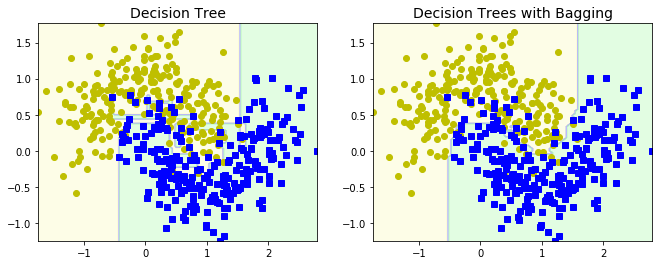

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# define our decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
# 500 copies of the predictor, which has 100 samples from training set
# n_jobs=-1 for utilizing all cores 
bag_clf = BaggingClassifier(tree_clf, 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)

# fit the bagging classifier
bag_clf.fit(X_train, Y_train)
tree_clf.fit(X_train, Y_train)

Y_pred_bag = bag_clf.predict(X_test)
Y_pred_tree = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Bagging Classifier")
print(accuracy_score(Y_test, Y_pred_bag))
print("Decision Tree Classifier")
print(accuracy_score(Y_test, Y_pred_tree))

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

### 7.2 Exercise: Bagging or Pasting
* What is the difference between these two techniques which select a subset of a training set?
* When do you think it is better to use bagging or pasting?


## 7.3 Gradient Boosting
In Gradient Boosting, we start with a single predictor. Sequentially, we add new predictors to _an ensemble_ that corrects its predecessor. In detail:

The algorithm is for `3 predictors` in our ensemble:
1. Pick a set of weak predictors (e.g. DecisionTreeRegressor(max_depth=2))
    - For this example, it is `3`.
2. Train the initial predictor on training set
3. Train the second predictor on residual errors (use only errors, i.e. `y2 = y - predictor1.predict(X)`)
3. Train the third predictor on the residual errors of the second predictor
4. Use all predictors and sum their predictions (if regression)

### Exercise 7.3: Implement, Plot and Compare
1. Implement this boosting technique that is explained above with `n` predictors.
    - Use the `quadratic training set` as a regression task.
    - Use `DecisionTreeRegressor(max_depth=2)` as a weak predictor
2. For $n=3$, plot step by step the evolution of the ensemble predictions
    - First figure with only one predictor
    - Second figure with two predictors
    - Third figure with three predictors 
3. Use sci-kit learn's `GradientBoostingRegressor` and compare if your results are similiar.
4. Do you think this boosting technique is scalable in practice? 

Tips:
-  **Plotting**: this is similar as before in Regression section 6.2, as explained earlier.
-  **GradientBoostingRegressor**: use this code snippet:
```python
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,Y)
```

In [25]:
# Your implementation here


## Recap

At this point, we demonstrated these concepts:

* training and visualizing various models from Decision Trees and Ensemble Learning
* details about some hyperparameters and how to regularize the models
* different training methods for ensemble learning
* how a boosting technique works and its properties.

Of course, there are some material that we have not be able to cover. In your free time, it can be better to have a look at:

* **Decision Trees**
  * How hard is it to find the best split to construct the _optimal tree_? 
  * Why is CART algorithm called _a greedy algorithm_?
* **Ensemble Learning and Random Forests**
  * Difference between Extra-Trees and Random Forests
  * How does AdaBoost work?
  * Learning Feature Importance with Random Forests
  * What is `Stacking`?
